In [1]:
import numpy as np
import matplotlib.pyplot as plt

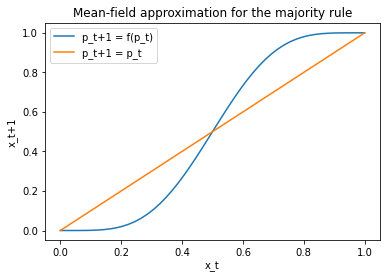

In [2]:
#Function for the next state (p) for the majority rule - Simplified function

def majority_func(x):
    
    return 70*x**9 - 315*x**8 + 540*x**7 - 420*x**6 + 126*x**5

x = np.linspace(0,1,50)

plt.figure()
plt.xlabel("x_t")
plt.ylabel("x_t+1")
plt.plot(x, majority_func(x), label = "p_t+1 = f(p_t)")
plt.plot(x, x, label = "p_t+1 = p_t")
plt.legend()
plt.title("Mean-field approximation for the majority rule")
plt.show()

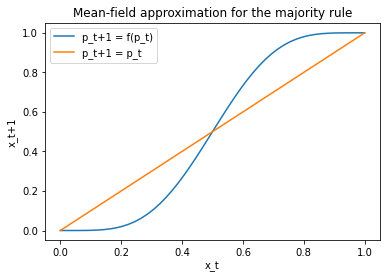

In [3]:
#Function for the next state (p) for the majority rule - full expression

from scipy.special import comb

p = x

result = (
    (1-p) * sum([
    comb(8, k) * p**k * (1-p)**(8-k)
    for k in range(5, 9)]) +
    p * sum([
    comb(8, k) * p**k * (1-p)**(8-k)
    for k in range(4, 9)]))

plt.figure()
plt.xlabel("x_t")
plt.ylabel("x_t+1")
plt.plot(x, result, label = "p_t+1 = f(p_t)")
plt.plot(x, x, label = "p_t+1 = p_t")
plt.legend()
plt.title("Mean-field approximation for the majority rule")
plt.show()

In this cell, the work leading up to the probablity for next transition for the game of life will be outlined.

We will only consider the cases where the next state is 1 (alive) since it's the transitions of interest when calculating p when having only two states.

For the first case we have the current state being 0. In this case, there is only one sum that will lead to 1 which is that three neighbors are alive. The probability of 0 is (1-p) and will be multiplied the binomial distribution PMF n = 8 and k = 3.

For the second case we have the current state being 1. In this case, there is two sums that will lead to 1 which is that two or three neighbors are alive. The probability of 1 is p and will be multiplied the binomial distribution PMF with n = 8 and k = 2 or 3.

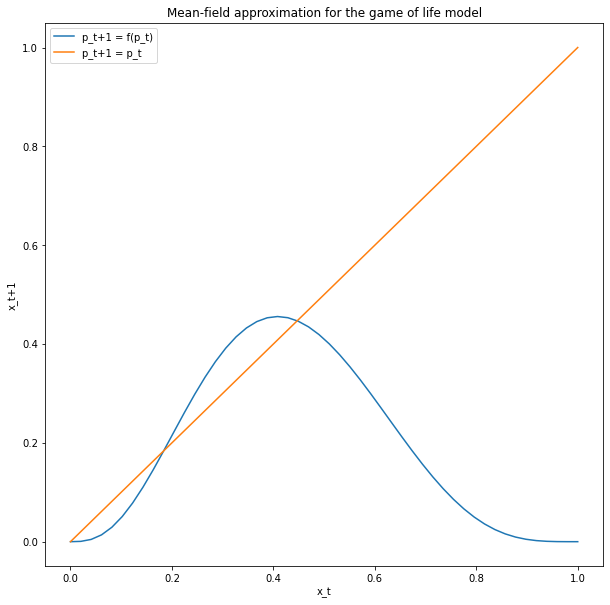

In [4]:
p = x

result = (
    (1-p) * sum([
    comb(8, 3) * p**k * (1-p)**(8-k)
    for k in range(3, 3+1)]) +
    p * sum([
    comb(8, k) * p**k * (1-p)**(8-k)
    for k in range(2, 3+2)]))

plt.figure(figsize = (10,10))
plt.xlabel("x_t")
plt.ylabel("x_t+1")
plt.plot(x, result, label = "p_t+1 = f(p_t)")
plt.plot(x, x, label = "p_t+1 = p_t")
plt.legend()
plt.title("Mean-field approximation for the game of life model")
plt.show()

We will have three equilibrium points 

x = 0; This will be an stable equilbrium

x = Approximately 0.2 - This will be an unstalbe equilibrium

x = Approximately 0.4 - This will be a stable equilibrium

In [7]:
#for the game of life

%matplotlib inline

import matplotlib

from pylab import *

n = 100 # size of space: n x n
p = 0.15 # probability of cell to be alive in initial coonfiguratioon

def initialize():
    global config, nextconfig, density
    config = zeros([n, n])
    density = []
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else 0
    nextconfig = zeros([n, n])
    density.append(sum(config)/n**2)
    
def observe():
    global config, nextconfig
    cla()
    pylab.subplot(1,2,1)
    pylab.imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)
    pylab.subplot(1,2,2)
    pylab.plot(list(range(i+2)), density)

def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            
            if config[x,y] == 1 and count >= 3 and count <= 4:
                nextconfig[x, y] = 1
            elif config[x,y] == 0 and count == 3:
                nextconfig[x, y] = 1
            else:
                nextconfig[x, y] = 0

    config, nextconfig = nextconfig, config
    density.append(sum(config)/n**2)

My theoretical and empirical results doesn't align very well. My empirical results predicts a stable equilibrium around 0.1. 

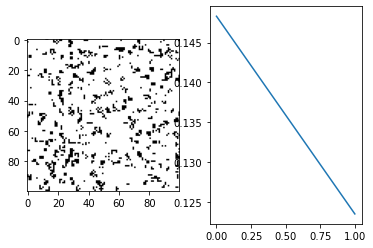

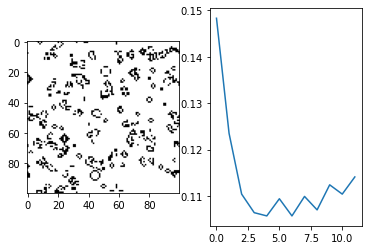

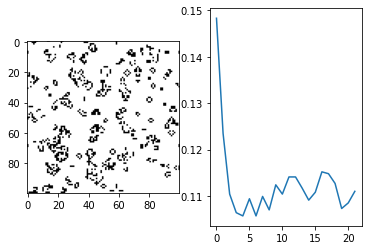

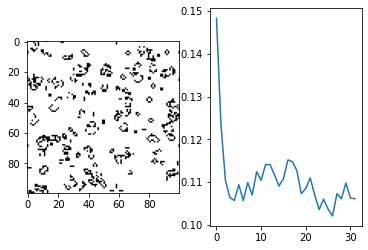

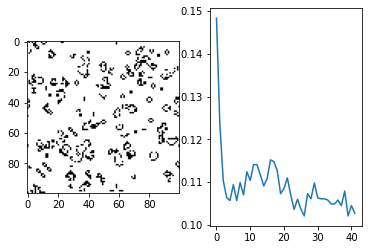

In [8]:
steps = 50

initialize()
for i in range(steps):
    update()
    if i % 10 == 0:
        show(observe())